# Contextualização 

Realizar o fitting de curvas disponibilizadas em aula através de diferentes funções

Curve Fitting Practice, 25/09/2024  <p>

Use the example of curve_fitting in SDA04 and fit the apropriate model to the data in the 5 files here: https://github.com/pjasimoes/sda <p>

Click in each file, and click "Raw" to get the direct link to the file to read it in Colab; or download the files in your own computer. <p>

Tip: you will have to define a function for each model: line, cosine, exponential, gaussian, parabola.


In [1]:
## https://github.com/pjasimoes/sda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Fórmula geral da função linear

f(x) = a*x 


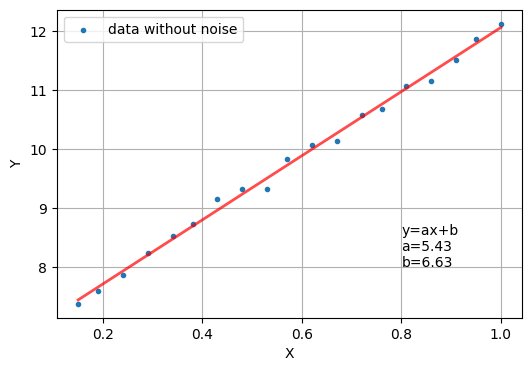

In [57]:
line_url = "https://raw.githubusercontent.com/pjasimoes/sda/refs/heads/main/line.csv"
data_line = pd.read_csv(line_url)

keys = data_line.keys()

x = data_line[keys[0]]
y = data_line[keys[1]]

data_line.columns = ['x', 'y']
data_line

def line_model(x, a, b):
    return a*x + b

p0 = [1.0, 0.0] ## initial guesses for a & b
sigma = y*0 ## uncertainties to zero, perfect data! (never true!)

## function,x_data,y_data,initial_guess,uncertainty,
par,pcov = curve_fit(line_model,x,y,p0=p0)

## pcov is the covariance matrix (search it!); to get uncertainties in the
## fitted parameters:
perr = np.sqrt(np.diag(pcov))

f_model = line_model(x,par[0],par[1])

###############################################################################

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

ax.scatter(x,y,zorder=2,label='data without noise',marker='.')

## model!
ax.plot(x,f_model,color='r',alpha=0.7,linewidth=2)

label = 'y=ax+b\na={:3.2f}'.format(par[0])+'\nb={:3.2f}'.format(par[1])
ax.annotate(label,(0.8,8))

ax.legend()
plt.show()



## Fórmula geral do cosseno 
A fórmula geral para uma onda cosseno é:

𝑓(𝑥) = 𝐴⋅cos(𝐵⋅𝑥+𝐶)+𝐷

A: Amplitude da onda. Determina a altura máxima da onda.
B: Frequência angular. Determina o número de ciclos que a onda completa em um intervalo específico. A frequência (em Hz) está relacionada à frequência angular por 
C: Fase. Deslocamento horizontal da onda. Ele move a onda para a esquerda ou para a direita ao longo do eixo x.
D: Deslocamento vertical ou offset. Ele move toda a onda para cima ou para baixo no eixo y.

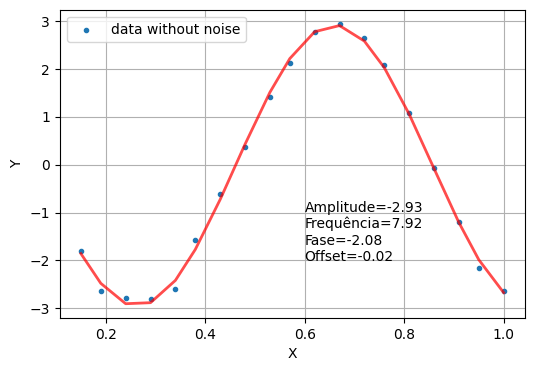

In [2]:
cos_url = "https://raw.githubusercontent.com/pjasimoes/sda/refs/heads/main/cos.csv"
data_cos = pd.read_csv(cos_url)
data_cos.columns = ['x', 'y']

keys = data_cos.keys()

x = data_cos[keys[0]]
y = data_cos[keys[1]]

data_cos.describe()

def cos_model(x, amplitude, frequency, phase, offset):
    return amplitude * np.cos(frequency * x + phase) + offset

# amplitude, frequency, phase, offset
p0 = [1.0, 1.0, 1, 0.0]

# Suposição de incerteza para os dados (não alterada)
sigma = y * 0  # incertezas zeradas (zero ou 1)

# Ajuste da curva usando a função do cosseno
parametros_ajustados, matriz_covariancia = curve_fit(cos_model, x, y, p0=p0)

# Obter incertezas nos parâmetros ajustados
perr = np.sqrt(np.diag(matriz_covariancia))

# Modelo ajustado usando os parâmetros ajustados
f_model = cos_model(x, parametros_ajustados[0], parametros_ajustados[1], parametros_ajustados[2], parametros_ajustados[3])

###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dados sem ruído
ax.scatter(x, y, zorder=2, label='data without noise', marker='.')

# Modelo ajustado
ax.plot(x, f_model, color='r', alpha=0.7, linewidth=2)

# Label mostrando os parâmetros ajustados
label = 'Amplitude={:3.2f}'.format(parametros_ajustados[0]) + '\nFrequência={:3.2f}'.format(parametros_ajustados[1])
label += '\nFase={:3.2f}'.format(parametros_ajustados[2]) + '\nOffset={:3.2f}'.format(parametros_ajustados[3])
ax.annotate(label, (0.6, -2))

ax.legend()
plt.show()

## Fórmula geral da função exponencial 

f(x)=A⋅e (B⋅x)+D

A: Amplitude (ou coeficiente), que escala a função exponencial.
B: Taxa de crescimento (ou decrescimento). Se 𝐵 > 0, a função cresce exponencialmente; se 𝐵 < 0, a função decresce.
D: Deslocamento vertical (ou offset), que move a função para cima ou para baixo no gráfico.

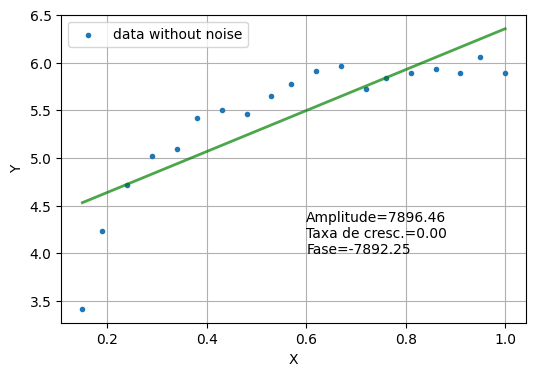

In [60]:
exp_url = "https://raw.githubusercontent.com/pjasimoes/sda/refs/heads/main/exp.csv"
data_exp = pd.read_csv(exp_url)
data_exp.columns = ['x', 'y']

keys = data_exp.keys()

x = data_exp[keys[0]]
y = data_exp[keys[1]]

data_exp.describe()

def exp_model(x, amplitude, growth_rate, offset):
    return amplitude * np.exp(growth_rate * x) + offset

# amplitude, growth_rate, offset
p0 = [1.0, 0.1, 0.0]

# Suposição de incerteza para os dados (não alterada)
sigma = y * 0  # incertezas zeradas (zero ou 1)

# Ajuste da curva usando a função do cosseno
parametros_ajustados, matriz_covariancia = curve_fit(exp_model, x, y, p0=p0,  maxfev=5000)

# Obter incertezas nos parâmetros ajustados
perr = np.sqrt(np.diag(matriz_covariancia))

# Modelo ajustado usando os parâmetros ajustados
f_model = exp_model(x, parametros_ajustados[0], parametros_ajustados[1], parametros_ajustados[2])

###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dados sem ruído
ax.scatter(x, y, zorder=2, label='data without noise', marker='.')

# Modelo ajustado
ax.plot(x, f_model, color='green', alpha=0.7, linewidth=2)

# Label mostrando os parâmetros ajustados
label = '\nAmplitude={:3.2f}'.format(parametros_ajustados[0]) + '\nTaxa de cresc.={:3.2f}'.format(parametros_ajustados[1])
label += '\nFase={:3.2f}'.format(parametros_ajustados[2])
ax.annotate(label, (0.6, 4.0))

ax.legend()
plt.show()



## Função gaussiana

F(x) = H e-h2(x-m)2

In [62]:
gauss_url = "https://raw.githubusercontent.com/pjasimoes/sda/refs/heads/main/gauss.csv"
data_gauss = pd.read_csv(gauss_url)
data_gauss.columns = ['x', 'y']

keys = data_gauss.keys()

x = data_gauss[keys[0]]
y = data_gauss[keys[1]]

data_gauss.describe()

,x,y
count,19.000000,19.000000
mean,0.573684,1.406842
std,0.267067,1.548394
min,0.150000,-0.050000
25%,0.360000,0.090000
50%,0.570000,0.760000
75%,0.785000,2.620000
max,1.000000,4.210000


In [63]:
def gauss_model(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

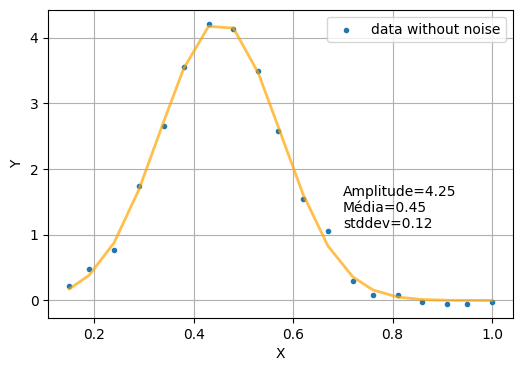

In [64]:
# amplitude, mean, stddev
p0 = [1.0, 1.406842, 1.548394]

# Suposição de incerteza para os dados (não alterada)
sigma = y * 0  # incertezas zeradas (zero ou 1)

# Ajuste da curva usando a função gaussiana
parametros_ajustados, matriz_covariancia = curve_fit(gauss_model, x, y, p0=p0)

# Obter incertezas nos parâmetros ajustados
perr = np.sqrt(np.diag(matriz_covariancia))

# Modelo ajustado usando os parâmetros ajustados
f_model = gauss_model(x, parametros_ajustados[0], parametros_ajustados[1], parametros_ajustados[2])

###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dados sem ruído
ax.scatter(x, y, zorder=2, label='data without noise', marker='.')

# Modelo ajustado
ax.plot(x, f_model, color='orange', alpha=0.7, linewidth=2)

# Label mostrando os parâmetros ajustados
label = 'Amplitude={:3.2f}'.format(parametros_ajustados[0]) + '\nMédia={:3.2f}'.format(parametros_ajustados[1])
label += '\nstddev={:3.2f}'.format(parametros_ajustados[2])
ax.annotate(label, (0.7, 1.1))

ax.legend()
plt.show()



## Função Parábola (ou função quadratica)
(f(x) = ax2 + bx + c)

In [49]:
parab_url = "https://raw.githubusercontent.com/pjasimoes/sda/refs/heads/main/parab.csv"
data_parab = pd.read_csv(parab_url)
data_parab.columns = ['x', 'y']

keys = data_parab.keys()

x = data_parab[keys[0]]
y = data_parab[keys[1]]

data_parab.describe()

,x,y
count,19.000000,19.000000
mean,0.573684,0.392632
std,0.267067,0.314693
min,0.150000,-0.140000
25%,0.360000,0.145000
50%,0.570000,0.280000
75%,0.785000,0.655000
max,1.000000,0.920000


In [50]:
def parab_model(x,a,b,c): 
    return a * x**2 + b * x + c

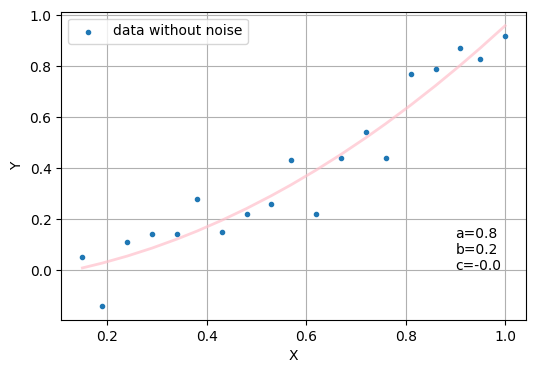

In [51]:
# a(max), b(min), c
p0 = [1.0, -0.14, 0.0] 

# Suposição de incerteza para os dados (não alterada)
sigma = y * 0  # incertezas zeradas (zero ou 1)

# Ajuste da curva usando a função da parábola 
parametros_ajustados, matriz_covariancia = curve_fit(parab_model, x, y, p0=p0)

# Obter incertezas nos parâmetros ajustados
perr = np.sqrt(np.diag(matriz_covariancia))

# Modelo ajustado usando os parâmetros ajustados
f_model = parab_model(x, parametros_ajustados[0], parametros_ajustados[1], parametros_ajustados[2])

###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dados sem ruído
ax.scatter(x, y, zorder=2, label='data without noise', marker='.')

# Modelo ajustado
ax.plot(x, f_model, color='pink', alpha=0.7, linewidth=2)

# Label mostrando os parâmetros ajustados
label = 'a={:3.1f}'.format(parametros_ajustados[0]) + '\nb={:3.1f}'.format(parametros_ajustados[1])
label += '\nc={:3.1f}'.format(parametros_ajustados[2])
ax.annotate(label, (0.9, 0.0))

ax.legend()
plt.show()